Recitation 1: Encryption
========================

In this lab we will get hands-on experience with different encryption methods: The Caesar Cipher, AES, and RSA.

Start by running the command below, to install the required libraries.

In [1]:
!pip install pycrypto

     |████████████████████████████████| 446 kB 3.6 MB/s eta 0:00:01
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp38-cp38-macosx_10_9_x86_64.whl size=492759 sha256=cc0dc7c2121455467ba84ae6b859a90c82a70a9c7f0880aa273f2a436e952d6e
  Stored in directory: /Users/felipelima/Library/Caches/pip/wheels/d0/99/d0/0298ea019d63f1d63a0965b9944b719e875f9bd6ffc6dcf293
Successfully built pycrypto


First, let's come up with a plaintext string which we will encrypt. Imagine this is some text we want to keep secret. Feel free to replace it with something else, but this exercise works best when it's about a paragraph long:

In [4]:
plaintext = (
    "The FitnessGram Pacer Test is a multistage aerobic capacity test that progressively gets more difficult as it continues. "
    "The 20 meter pacer test will begin in 30 seconds. Line up at the start. The running speed starts slowly, but gets faster each minute after you hear this signal. "
    "A single lap should be completed each time you hear this sound. Remember to run in a straight line, and run as long as possible.")

Part 1: Caesar Cipher
---------------------
We would like to encrypt this message so that only we can read it. Let's start off by using a caesar cypher: this is a simple method of scrambling a message, by shifting each character by a secret amount. So if the secret were three, "a" would shift three letters to become "d", "h" would become "k", and so on. We can define a function to do this given a plaintext string and a secret shift value:

In [5]:
import string

def caesar_cipher(plaintext: str, secret: int):
    # This function shifts a single character.
    def shift_char(char: str):
        # Ignore special characters.
        if char not in string.ascii_letters:
            return char

        # We need to do a little math so that letters at the end of the alphabet wrap around.
        if char.isupper():
            return chr((ord(char) - ord("A") + secret) % 26 + ord("A"))
        else:
            return chr((ord(char) - ord("a") + secret) % 26 + ord("a"))
    
    # Shift each character by the secret amount
    shifted_chars = [shift_char(char) for char in plaintext]

    # Join them back into a string
    return "".join(shifted_chars)

Now when we run the code below, we can see that we've scrambled the text, and nobody can read it without the secret key! ...right?

In [6]:
secret_key = 7

ciphertext = caesar_cipher(plaintext, secret_key)

print("Ciphertext:")
print("===========")
print(ciphertext)

Ciphertext:
Aol MpaulzzNyht Whjly Alza pz h tbsapzahnl hlyvipj jhwhjpaf alza aoha wyvnylzzpclsf nlaz tvyl kpmmpjbsa hz pa jvuapublz. Aol 20 tlaly whjly alza dpss ilnpu pu 30 zljvukz. Spul bw ha aol zahya. Aol ybuupun zwllk zahyaz zsvdsf, iba nlaz mhzaly lhjo tpubal hmaly fvb olhy aopz zpnuhs. H zpunsl shw zovbsk il jvtwslalk lhjo aptl fvb olhy aopz zvbuk. Yltltily av ybu pu h zayhpnoa spul, huk ybu hz svun hz wvzzpisl.


We can reverse the process by shifting backwards by the same amount. Only the same secret will work however, and shifting by a different amount will still result in scrambled text:

In [7]:
print("Plaintext:")
print("==========")
print(caesar_cipher(ciphertext, -secret_key))
print()
print("Incorrect plaintext (uses the wrong secret key):")
print("==========")
print(caesar_cipher(ciphertext, -secret_key + 1))

Plaintext:
The FitnessGram Pacer Test is a multistage aerobic capacity test that progressively gets more difficult as it continues. The 20 meter pacer test will begin in 30 seconds. Line up at the start. The running speed starts slowly, but gets faster each minute after you hear this signal. A single lap should be completed each time you hear this sound. Remember to run in a straight line, and run as long as possible.

Incorrect plaintext (uses the wrong secret key):
Uif GjuofttHsbn Qbdfs Uftu jt b nvmujtubhf bfspcjd dbqbdjuz uftu uibu qsphsfttjwfmz hfut npsf ejggjdvmu bt ju dpoujovft. Uif 20 nfufs qbdfs uftu xjmm cfhjo jo 30 tfdpoet. Mjof vq bu uif tubsu. Uif svoojoh tqffe tubsut tmpxmz, cvu hfut gbtufs fbdi njovuf bgufs zpv ifbs uijt tjhobm. B tjohmf mbq tipvme cf dpnqmfufe fbdi ujnf zpv ifbs uijt tpvoe. Sfnfncfs up svo jo b tusbjhiu mjof, boe svo bt mpoh bt qpttjcmf.


Part 1a: Brute Forcing
---------------------
So far, this cipher can scramble a message so it cannot be read, and it can only be unscrambled with the secret key. We're secure now, right? Well, not really. For one thing, there's only 25 possible shifts you can make before the characters loop back around. An attacker could simply try each one and see which one is correct. Below is some unknown ciphertext, see if you can figure out what it is just by iterating through all 25 shifts:

In [9]:
unknown_ciphertext = "Aipp, xlex aew vieppc iewc xs fvieo."
for x in range (0,25):
    print(caesar_cipher(unknown_ciphertext, x))

Aipp, xlex aew vieppc iewc xs fvieo.
Bjqq, ymfy bfx wjfqqd jfxd yt gwjfp.
Ckrr, zngz cgy xkgrre kgye zu hxkgq.
Dlss, aoha dhz ylhssf lhzf av iylhr.
Emtt, bpib eia zmittg miag bw jzmis.
Fnuu, cqjc fjb anjuuh njbh cx kanjt.
Govv, drkd gkc bokvvi okci dy lboku.
Hpww, esle hld cplwwj pldj ez mcplv.
Iqxx, ftmf ime dqmxxk qmek fa ndqmw.
Jryy, gung jnf ernyyl rnfl gb oernx.
Kszz, hvoh kog fsozzm sogm hc pfsoy.
Ltaa, iwpi lph gtpaan tphn id qgtpz.
Mubb, jxqj mqi huqbbo uqio je rhuqa.
Nvcc, kyrk nrj ivrccp vrjp kf sivrb.
Owdd, lzsl osk jwsddq wskq lg tjwsc.
Pxee, matm ptl kxteer xtlr mh ukxtd.
Qyff, nbun qum lyuffs yums ni vlyue.
Rzgg, ocvo rvn mzvggt zvnt oj wmzvf.
Sahh, pdwp swo nawhhu awou pk xnawg.
Tbii, qexq txp obxiiv bxpv ql yobxh.
Ucjj, rfyr uyq pcyjjw cyqw rm zpcyi.
Vdkk, sgzs vzr qdzkkx dzrx sn aqdzj.
Well, that was really easy to break.
Xfmm, uibu xbt sfbmmz fbtz up csfbl.
Ygnn, vjcv ycu tgcnna gcua vq dtgcm.


Part 1b: Frequency Analysis
--------------------------

The small number of possiblities isn't the only problem, however. The Caesar Cipher does not scramble the characters very much, and there are a lot of patterns that we can use to determine the secret key. One tactic is frequency analysis: looking at which letters show up most often. The English language uses some letters more than others, so letters like "E", "A", and "T" are very common while letters like "Z", "X", and "J" are almost never used. We can find these frequencies online, and graph the result:

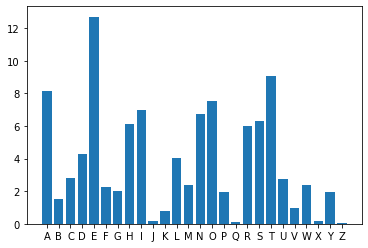

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

letter_frequencies = {
    'A': 8.167,
    'B': 1.492,
    'C': 2.782,
    'D': 4.253,
    'E': 12.702,
    'F': 2.228,
    'G': 2.015,
    'H': 6.094,
    'I': 6.996,
    'J': 0.153,
    'K': 0.772,
    'L': 4.025,
    'M': 2.406,
    'N': 6.749,
    'O': 7.507,
    'P': 1.929,
    'Q': 0.095,
    'R': 5.987,
    'S': 6.327,
    'T': 9.056,
    'U': 2.758,
    'V': 0.978,
    'W': 2.360,
    'X': 0.150,
    'Y': 1.974,
    'Z': 0.074
}

plt.bar(letter_frequencies.keys(), letter_frequencies.values())

plt.show()

Now, let's write a function to show the letter frequencies of a particular piece of text, and pass it the plaintext and the ciphertext from earlier:

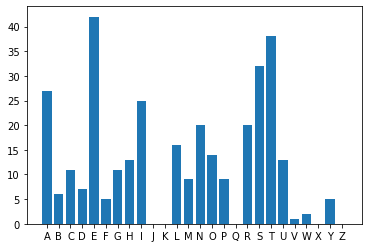

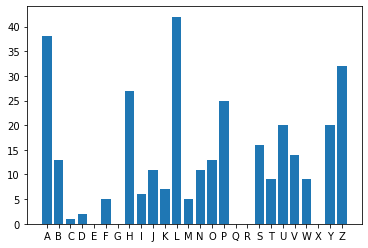

In [11]:
from collections import Counter
import base64

def show_frequencies(s: str):
    character_counts = Counter(s.upper())

    plt.bar(list(string.ascii_uppercase), [character_counts.get(char, 0) for char in string.ascii_uppercase])
    plt.show()

show_frequencies(plaintext)
show_frequencies(ciphertext)

The plaintexttext (the first graph) should look very to the average English Language frequency from before! The ciphertext (the second graph) looks different, however: because we are changing each character by the same amount, the graph has been shifted. However, it is easy to tell how far it was shifted just by looking at it! By looking at the very common or very uncommon letters, it is possible to tell how far they have shifted between the two graphs. This number is the supposedly "secret" key! Below is a large block of new ciphertext, and you are not given the secret key. See if you can calculate the key by looking at the frequency graph, without brute-forcing it.

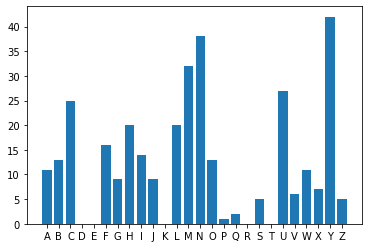

The FitnessGram Pacer Test is a multistage aerobic capacity test that progressively gets more difficult as it continues. The 20 meter pacer test will begin in 30 seconds. Line up at the start. The running speed starts slowly, but gets faster each minute after you hear this signal. A single lap should be completed each time you hear this sound. Remember to run in a straight line, and run as long as possible.


In [13]:
new_ciphertext = (
    "Nby ZcnhymmAlug Juwyl Nymn cm u gofncmnuay uylivcw wujuwcns nymn nbun jlialymmcpyfs aynm gily xczzcwofn um cn wihnchoym. "
    "Nby 20 gynyl juwyl nymn qcff vyach ch 30 mywihxm. Fchy oj un nby mnuln. Nby lohhcha mjyyx mnulnm mfiqfs, von aynm zumnyl yuwb gchony uznyl sio byul nbcm mcahuf. "
    "U mchafy fuj mbiofx vy wigjfynyx yuwb ncgy sio byul nbcm miohx. Lygygvyl ni loh ch u mnlucabn fchy, uhx loh um fiha um jimmcvfy.")

show_frequencies(new_ciphertext)
print(caesar_cipher(new_ciphertext, 6))


Part 2: AES
===========

We can see that the Caesar Cipher is not a useful method of keeping data safe. Instead, we will use the more complex AES cipher. The AES cipher performs a much more complicated operation than simply shifting the character, which we won't go into depth on here, but suffice to say it leaves the output sufficiently scrambled. It also uses a much longer secret: a string of bits, which can be as long as necessary to ensure security.

In [14]:
from Crypto.Cipher import AES

# Rather than an integer, the secret is now a long string of bytes (length must be a power of 2)
secret = 'GZktMap1FgML5sa2'
aes_cipher = AES.new(secret, AES.MODE_ECB)

# The plaintext must be a multiple of 16 for the cipher to work, so we add some '0's to the end as padding.
# We haven't implemented a way of removing this padding afterwards yet, so you may still see it in the output.
padding = '0' * (16 - (len(plaintext) % 16))

aes_ciphertext = aes_cipher.encrypt(plaintext + padding)

print(aes_ciphertext)

b'\xdc\x0cM\x9d\xc4\x0b\xdb\xd1\x86\x9f9\xd3\xb4}\x1b\x89"\x12gH\xf4\x1f\x16\x9f\x9d\xcaw\xcer]\x94q\xc8\xb0\xd1\x9dOP!y\xacb\xd8\xefj\x81\xfdS\xb75\xfcg\x91t\xf8\xc4\xa3 \x93l_\x02s\xb0\xcdQ\x0c\x11\xa4\x01R\xe8]\x89o1\x1f\xb8&_\\\xfc\xdb\rd\x8c\x98t\x0e`\xc6;\xf7\xdf2\xa3S-l\x1aQQ\xbe\xc8\x11c~\x8db\n\xba\xe8?.B\xe4o\x12\xdd\xdf\xe9\xbf\xf3\x86\x9fi\xe7\xbf\x9d\xb7|\xdb*N\x89\x9dZ 3\xdd\x90\x89\x8c\x86\x08\x9e\x88\xcb\xe0\x10\xa2Im\x8c\xb0\x80\xa9\xfc2z\xcee\x1d\xe1,\t\xb9CNG\xa1\xc3k\xf2\xdc\x95\xc1\xae\r\xcd\x81\xa7\xc9x\x1c\x1e\xa4\xe1\xaf\xf1\xf5\xf0\xf5\x86\t\xb4+\xe2m\xeaW\xf1\xbc\xc3z\x12a}\xff:s\xfd<3\xfd\xf1\xa7\x81Bb\xfe\x1b\xf8\xbc\xa6\x1ac"[\x9f\x1a\xa9\xf8\xda\xec\x85F\x91p\xd0*S8{\x83\x0c\xd2\xb0\xf0\xf7G\x0e\x14X\xcaEp\xf2\x07;\x19Da\x86\x7f\xc6\xc1\n\r\x88\xf8\x16si\xfaX\x94>\xb2,:g\xce\x81\xa8\xf0\x89\xbe\xb7I^]\x06b\xb2\x93{\xfeG\x90\x17\x18Ya\x98?\ry\xcaA\xdfL\x8f07k\xc7\xa2\xf1N\x88\xef\xbe\xfba\x80\xfd\xd7\xa330\xf0\xd2H&G\x97\x91nzj-\x80\x9d\xf8\xf4\x16\x89:\xf8

We can see immidiately that the output is far more scrambled than before. There is no resembalance to the original string. We can still decrypt this by reversing the operation, but doing so requires the same secret as before. Using the wrong secret fails to decrypt the ciphertext, and the result is still scrambled!

In [15]:
print('Original secret')
print('===============')
print(AES.new(key=secret, mode=AES.MODE_ECB).decrypt(aes_ciphertext))
print()
print('Incorrect secret')
print('================')
print(AES.new(key='thisisincorrect!', mode=AES.MODE_ECB).decrypt(aes_ciphertext))

Original secret
b'The FitnessGram Pacer Test is a multistage aerobic capacity test that progressively gets more difficult as it continues. The 20 meter pacer test will begin in 30 seconds. Line up at the start. The running speed starts slowly, but gets faster each minute after you hear this signal. A single lap should be completed each time you hear this sound. Remember to run in a straight line, and run as long as possible.000000'

Incorrect secret
b'\xb5~\x80\xed\x87\xb7\xae\x02\xd3\x19\x81\xac\xd90\x045/)j\xcf\xaf\xbc\x96\xe5\xd7w[\xfc\xaa\xc6K\xe0\x85\xcd\xd7i-3a\xa2\xb8<\x8a\xdc\xed5\x9cE`\x9a\x9ax\xebWOw\xe3\xc4\x97e\x9ao\x12]9U\xe4\xee\xe7\xdc\x85\xd1,B\xb8\xff}\x03`\x12\x02\t\xf1l\xaf;\x04<\xc2Y77\xae\x88\xc3^3\x16z\xab\x88\x17\x16\xf0,\xaa\xc3\xa5\xab\x9c\x00K\xdb!R3;HBH\'\x1b\xc2\x84\xf6)2\xa0\'\xc8?"\xa7\x00\xd5|\xe1@\x16\x08\xddT\xd4P\xcfm\x85&\xf9\xd5\xdfr\x89\xa2\xffrw\xce\x9e\xc7=\xd0\xca\xb5\x05\xc8\x11N\x9eE\xf9\xe3\xad\xefh\xdb\x86n\xf3\xbc8\x96\\\xb2\xaf\xca\x03\x94V

Because the secret is now a long string and not a small integer, brute-forcing the secret is much harder. This secret is 128 bits long, meaning there are **340,282,366,920,938,463,463,374,607,431,768,211,456** possible options! Here is one last piece of ciphertext, see if you can reverse it without knowing the secret in advance.

In [16]:
new_aes_ciphertext = (
    b"K\xa6\tz\xd5Q\x11\x07\xc9\xa5\x19pX\xbb\xd4\x1e\xcb\x99\xfbow&\xfdy\xcc\x1e\xf1\xc4\x999V\xb8\xb6\x1d\xbf\x7f\xc9\xbe\xf6"
    b"\xd5\x10\xbc\x07|0\xb3O\xd2\x07\x99\xfcr\x05\xd9\xc6\xc8\xae\xdb\xe3\xc7g\xde%\x02\xfb\xfe\xb4\x86\xa3\xa2\x1c\xd0h\xb3\xd6"
    b"oT;\x1fo\xb4\xef\x7f^M\xaa1\x8di\x16o\xceg|\\\xfc\t\xcc\x8f\x10\xc9\xb7\x120g?/\xb0\xc5\xd5\xfc\x1bJI!\x00\xfd\xdd\x94\xe6,"
    b"(\xc2\x0fJ\x96\xdc\xca\xd3^\xc3\xe7\x86\xd5\xe2\x95\xe9\xbfnh\xd0\xce\xf1;")

secret = '????????????????'
aes_cipher = AES.new(secret, AES.MODE_ECB)

print(aes_cipher.decrypt(new_aes_ciphertext))

b'\xf4\xe4\x1f\xc3\xe2Y\x90Sk\xba\x84\xc2\xd3\n\xfa38\x08{\xbf\xc3\xb6%\x1c\xc1\xaa!\x9e\xf1\xa1v\x01\xac\x9d\xfbB\x1c2%\xb3g\xe809\xff\xc5\xad\x81D\xcb\xe4L\xd2j\xbc\xba\x8dB\xd9\x1bi@\x89\t}H\x1c\xd3\xceQ\x19E~\x978\xeb\xfd=\xf2Ar\xcc\xc2hY\xe0\x86\x94\xfb<NI\xf2\x08T\x05s;\x905i_\xd4\x90\xc4_\x1e\x12qD4\xbfnX9\xbdS\xe2d\x9e\x8dw\x93G4\xa6\x9a\xfdFQ-\xa7H\xf9}\xba\xcf5\x82\xa6\\ @\xc2'
